In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(file)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#  Linear Regression and Multiple Linear Regression 

#  result of linear regression is a linear function that predicts the response(dependent) variable 
#  as a function of the predictor(independent) variable

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#  create the linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#  how highway-mpg can help predict car price

#  linear function with highway-mpg as predictor and price as response variable

X = df[["highway-mpg"]]
Y = df["price"]

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#  output prediction

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
#  value of intercept

lm.intercept_

38423.305858157386

In [8]:
#  value of slope

lm.coef_

array([-821.73337832])

In [ ]:
#  final estimated linear model

#  Yhat = a + bX

#  price = 38423.31 - 821.73 * highway-mpg

In [9]:
#  create linear regression object and train the model with engine size and price

lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lm1.fit(df[["engine-size"]], df[["price"]])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# slope

lm1.coef_

array([[166.86001569]])

In [12]:
#  intercept

lm1.intercept_

array([-7963.33890628])

In [13]:
#  final estimated linear model

#  Yhat = a + bX

#  price = 166.86 - 7963.34 * engine-size

In [ ]:
#  Multiple Linear Regression

#  predict car price using more than 1 variable

#  explain the relationship between 1 continuous(dependent) and 2 or more predictor(independent)

#  Yhat = a + b1*X1 + b2*X2 + b3*X3 + b4*X4

In [15]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [16]:
lm.fit(Z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#  intercept

lm.intercept_

-15806.624626329198

In [18]:
#  coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
#  final estimated linear model 

#  Yhat = a + b1*X1 + b2*X2 + b3*X3 + b4*X4

#  Price = -15806.62 + 53.49 * horsepower + 4.70 * curb-weight + 81.53 * engine-size + 36.05 * highway-mpg

In [ ]:
#  create and train a multiple linear regression model lm2 

#  response variable = price
#  predictor variable = normalized-losses, highway-mpg

In [19]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses", "highway-mpg"]], df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#  Model evaluation using visualization 

#  how do you evaluate the models and choose the best one?
#  by visualization

#  visualization package: seaborn

In [20]:
import seaborn as sns
%matplotlib inline

In [ ]:
# Regression Plot

#  shows a combination of a scattered data points (scatter plot)
#  as well as the fitted linear regression line 

#  gives reasonable estimate of:
#      relationship between 2 variables
#      strength of correlation
#      direction - positive or negative correlation 

(0, 48286.52644771456)

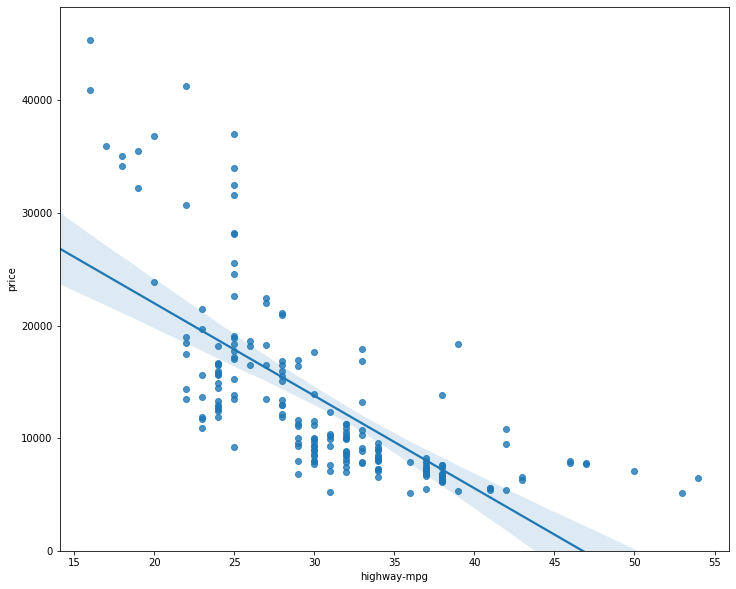

In [21]:
#  highway-mpg as a predictor of price

width = 12
height = 10

plt.figure(figsize=(width, height))

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [ ]:
#  price is negatively correlated to highway-mpg

(0, 47422.919330307624)

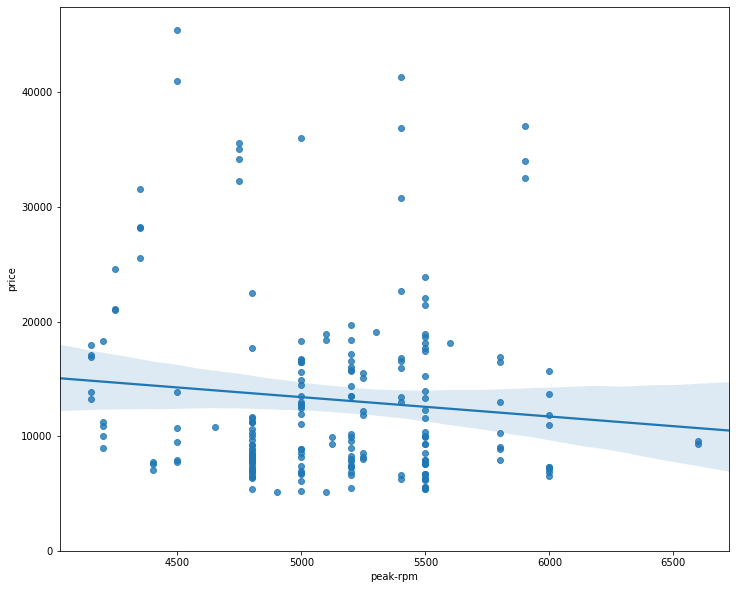

In [23]:
#  peak-rpm as predictor of price

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
#  regression plot
#  pay attention to how scattered the data points are around the regression line

#  good indication of the variance of the data, and whether a linear model would be the best fit or not 

# if the data is too far off from the line, this linear model might not be the best model for this data

In [24]:
#  is peak-rpm or highway-mpg more strongly correlated with price?

#  use the method .corr()

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
#  peak-rpm has stronger correlation with price

In [ ]:
#  Residual Plot

#  good way to visualize the variance of the data

#  residual = difference between observed value(y) and predicted value(yhat)
#  regression plot, residual is the difference from the data point to fitted 
#         regression line.


#  residual plot - graph that shows the residuals on vertical axis and the 
#         independent variable on the horizontal axis



#  if the points in a residual plot are randomly spread out around the x axis, 
#     a linear model is appropriate for the data. 

#  randomly spread out residuals means that the variance is constant, and thus the
#     linear model is a good fit for this data

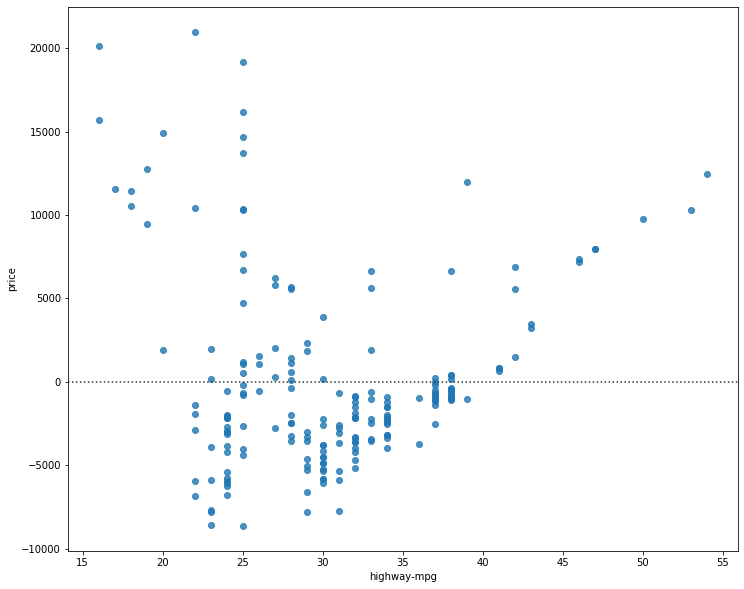

In [25]:
width = 12
height = 10

plt.figure(figsize=(width, height))

sns.residplot(df["highway-mpg"], df["price"])

plt.show()

In [ ]:
#  residuals are not randomly spred around the x axis
#  a non linear model is more appropriate for this data